NETFLIX DATASET - EXPLORATORY DATA ANALYSIS

📊 1. INITIAL DATA INSPECTION
--------------------------------------------------------------------------------

📌 Dataset Shape: 8807 rows × 12 columns

📌 Columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

📌 First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi

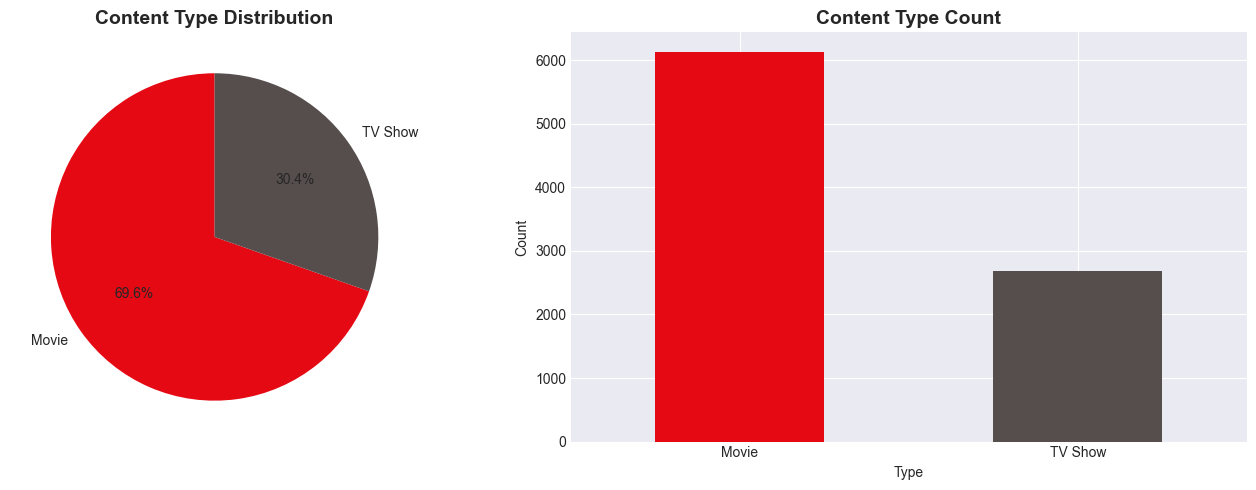

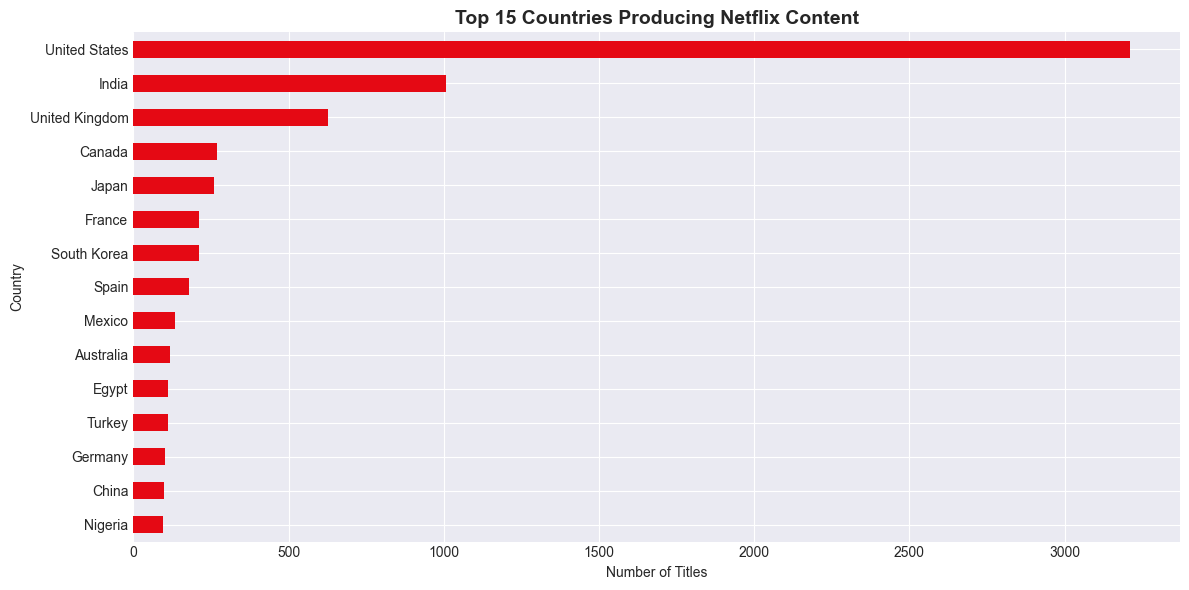

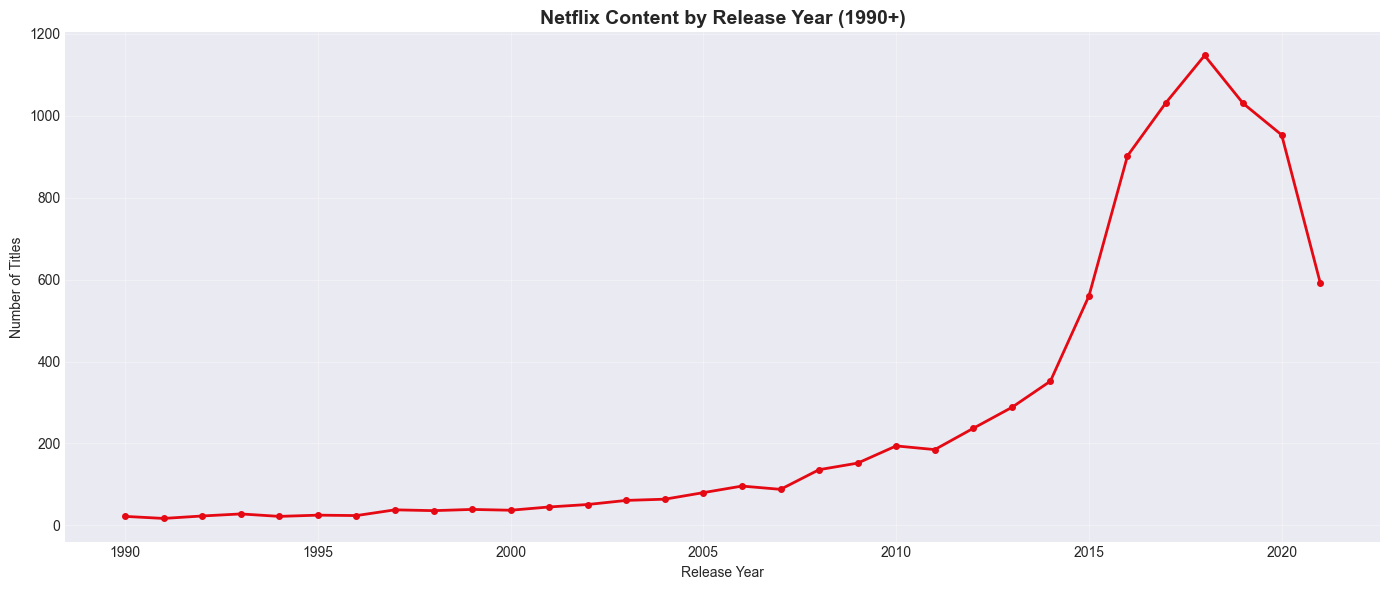

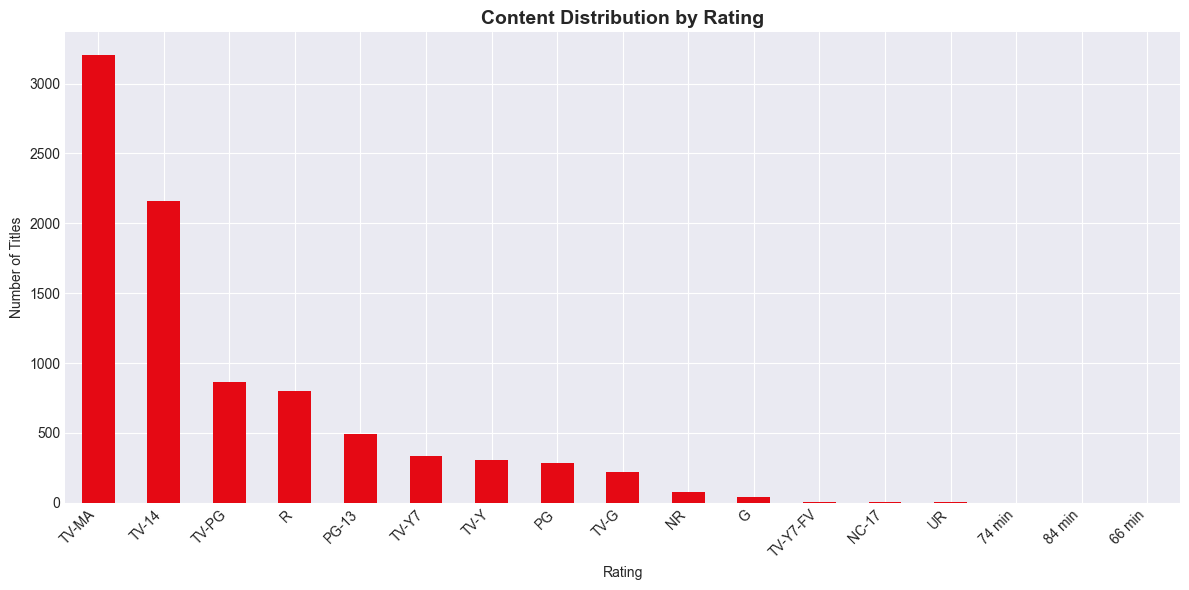

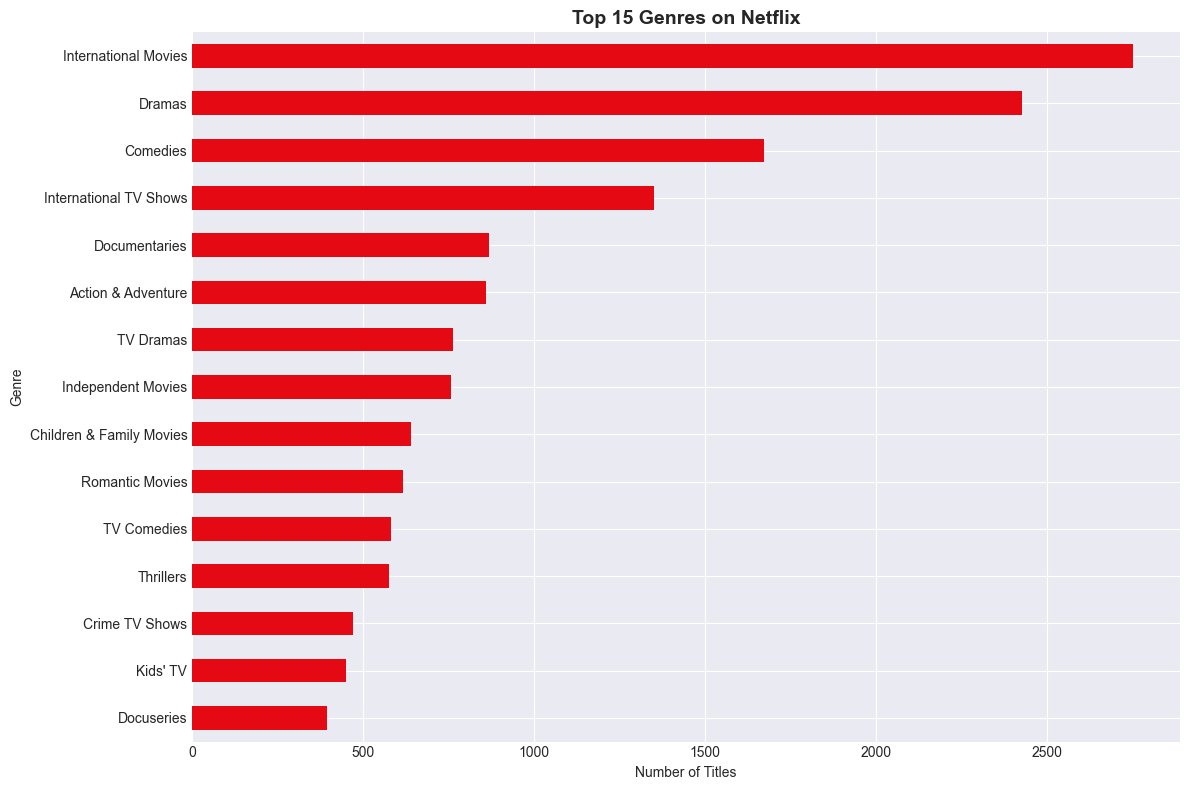

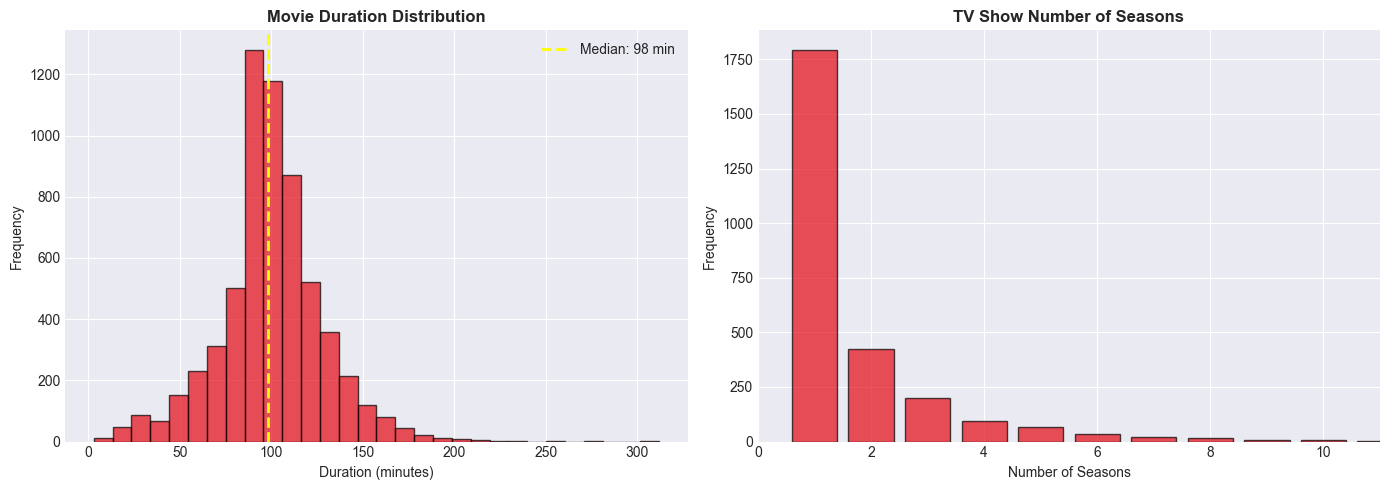

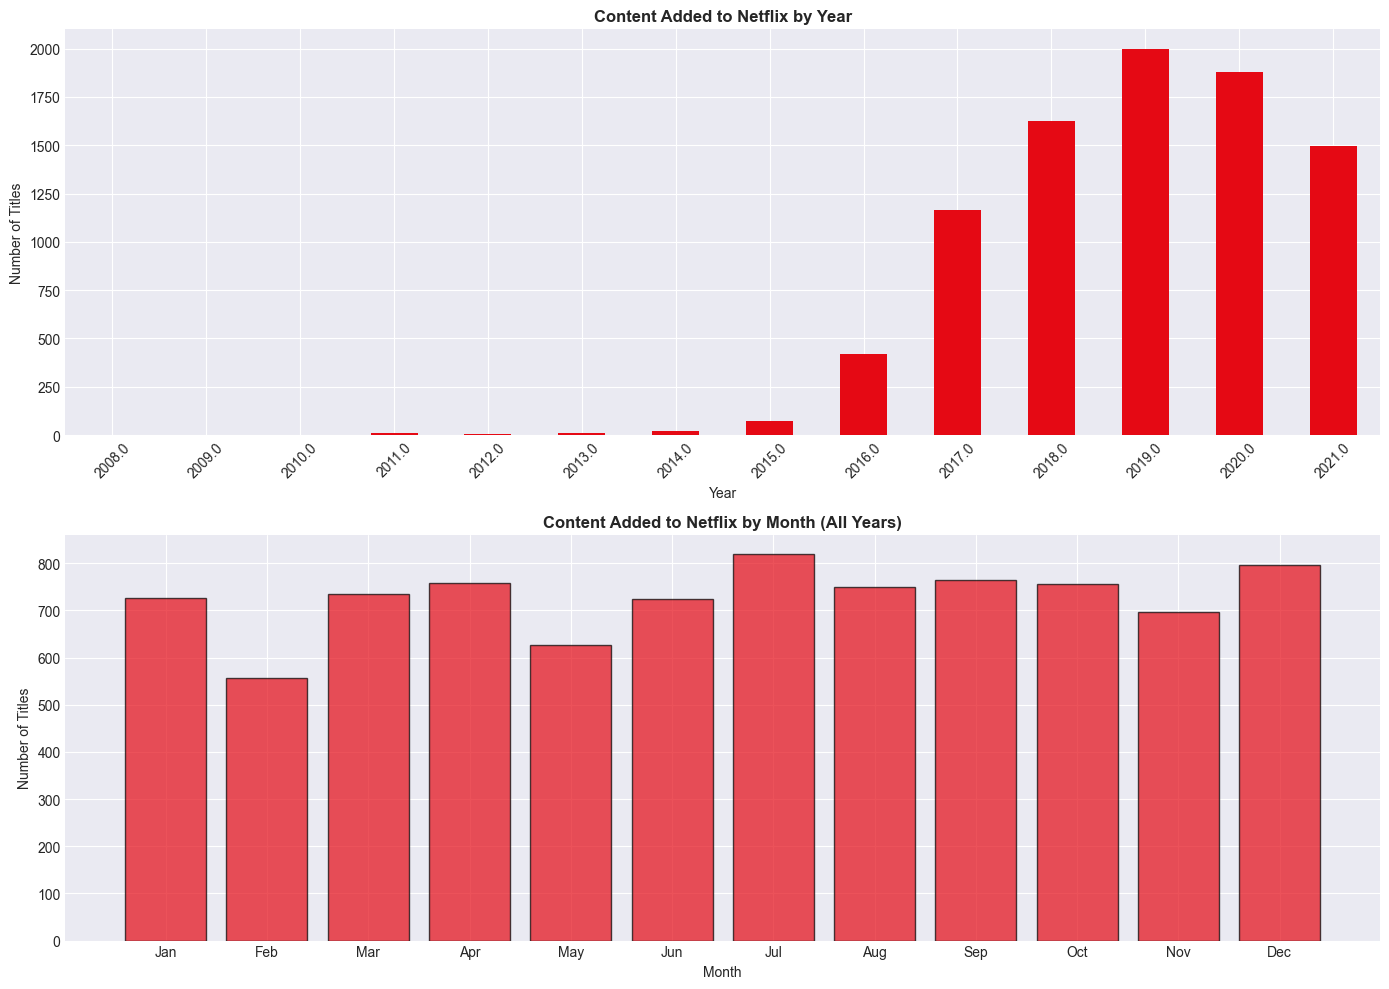

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
df = pd.read_csv('E:/work needs/Achive Data Analyst/Dataset Kaggle (Practice)/Netflix/netflix_titles.csv', sep=',', encoding='utf-8')

print("="*80)
print("NETFLIX DATASET - EXPLORATORY DATA ANALYSIS")
print("="*80)

# ============================================================================
# 1. INITIAL DATA INSPECTION
# ============================================================================
print("\n📊 1. INITIAL DATA INSPECTION")
print("-"*80)

print(f"\n📌 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📌 Columns:\n{df.columns.tolist()}")

print("\n📌 First 5 Rows:")
print(df.head())

print("\n📌 Data Types & Missing Values:")
print(df.info())

# ============================================================================
# 2. DATA QUALITY CHECK
# ============================================================================
print("\n\n🔍 2. DATA QUALITY CHECK")
print("-"*80)

print("\n📌 Missing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print(f"\n📌 Duplicate Rows: {df.duplicated().sum()}")

print("\n📌 Unique Values per Column:")
unique_df = pd.DataFrame({
    'Column': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns]
})
print(unique_df)

# ============================================================================
# 3. CONTENT TYPE ANALYSIS
# ============================================================================
print("\n\n🎬 3. CONTENT TYPE ANALYSIS")
print("-"*80)

type_counts = df['type'].value_counts()
print("\n📌 Distribution:")
print(type_counts)
print(f"\nMovie Percentage: {type_counts['Movie']/len(df)*100:.2f}%")
print(f"TV Show Percentage: {type_counts['TV Show']/len(df)*100:.2f}%")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#E50914', '#564d4d'])
axes[0].set_title('Content Type Distribution', fontsize=14, fontweight='bold')

# Bar chart
type_counts.plot(kind='bar', ax=axes[1], color=['#E50914', '#564d4d'])
axes[1].set_title('Content Type Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('01_content_type.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 01_content_type.png")

# ============================================================================
# 4. COUNTRY ANALYSIS
# ============================================================================
print("\n\n🌍 4. COUNTRY ANALYSIS")
print("-"*80)

# Bersihkan data country (ada yang multi-country)
df_country = df['country'].dropna()
# Split multi-country dan ambil yang pertama
countries = df_country.str.split(',').str[0].str.strip()

top_countries = countries.value_counts().head(15)
print("\n📌 Top 15 Countries:")
print(top_countries)

# Visualisasi
plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh', color='#E50914')
plt.title('Top 15 Countries Producing Netflix Content', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('02_top_countries.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 02_top_countries.png")

# ============================================================================
# 5. RELEASE YEAR TREND
# ============================================================================
print("\n\n📅 5. RELEASE YEAR TREND")
print("-"*80)

df_year = df.dropna(subset=['release_year'])
year_counts = df_year['release_year'].value_counts().sort_index()

# Filter tahun yang relevan (1990 onwards)
year_counts_filtered = year_counts[year_counts.index >= 1990]

print("\n📌 Content by Release Year (Recent):")
print(year_counts_filtered.tail(10))

# Visualisasi
plt.figure(figsize=(14, 6))
year_counts_filtered.plot(kind='line', marker='o', linewidth=2, markersize=4, color='#E50914')
plt.title('Netflix Content by Release Year (1990+)', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('03_release_year_trend.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 03_release_year_trend.png")

# ============================================================================
# 6. RATING ANALYSIS
# ============================================================================
print("\n\n⭐ 6. RATING ANALYSIS")
print("-"*80)

rating_counts = df['rating'].value_counts()
print("\n📌 Content Ratings:")
print(rating_counts)

# Visualisasi
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='#E50914')
plt.title('Content Distribution by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('04_ratings.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 04_ratings.png")

# ============================================================================
# 7. GENRE ANALYSIS
# ============================================================================
print("\n\n🎭 7. GENRE ANALYSIS")
print("-"*80)

# Split genres (karena satu konten bisa punya banyak genre)
all_genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(15)

print("\n📌 Top 15 Genres:")
print(top_genres)

# Visualisasi
plt.figure(figsize=(12, 8))
top_genres.plot(kind='barh', color='#E50914')
plt.title('Top 15 Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('05_top_genres.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 05_top_genres.png")

# ============================================================================
# 8. DURATION ANALYSIS
# ============================================================================
print("\n\n⏱️ 8. DURATION ANALYSIS")
print("-"*80)

# Movies - duration in minutes
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(float)

print("\n📌 Movie Duration Statistics (minutes):")
print(movies['duration_min'].describe())

# TV Shows - number of seasons
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)

print("\n📌 TV Show Seasons Statistics:")
print(tv_shows['num_seasons'].describe())

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Movie duration histogram
axes[0].hist(movies['duration_min'], bins=30, color='#E50914', edgecolor='black', alpha=0.7)
axes[0].set_title('Movie Duration Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(movies['duration_min'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Median: {movies["duration_min"].median():.0f} min')
axes[0].legend()

# TV Show seasons
tv_seasons_counts = tv_shows['num_seasons'].value_counts().sort_index()
axes[1].bar(tv_seasons_counts.index, tv_seasons_counts.values, color='#E50914', edgecolor='black', alpha=0.7)
axes[1].set_title('TV Show Number of Seasons', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 11)

plt.tight_layout()
plt.savefig('06_duration_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 06_duration_analysis.png")

# ============================================================================
# 9. DATE ADDED ANALYSIS
# ============================================================================
print("\n\n📆 9. DATE ADDED ANALYSIS")
print("-"*80)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Yearly trend
yearly_added = df['year_added'].value_counts().sort_index()
print("\n📌 Content Added per Year:")
print(yearly_added)

# Monthly trend (overall)
monthly_added = df['month_added'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Visualisasi
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Yearly
yearly_added.plot(kind='bar', ax=axes[0], color='#E50914')
axes[0].set_title('Content Added to Netflix by Year', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles')
axes[0].tick_params(axis='x', rotation=45)

# Monthly
axes[1].bar(monthly_added.index, monthly_added.values, color='#E50914', edgecolor='black', alpha=0.7)
axes[1].set_title('Content Added to Netflix by Month (All Years)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Titles')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)

plt.tight_layout()
plt.savefig('07_date_added_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: 07_date_added_analysis.png")

# ============================================================================
# 10. TOP DIRECTORS & ACTORS
# ============================================================================
print("\n\n🎬 10. TOP DIRECTORS & ACTORS")
print("-"*80)

# Directors
directors = df['director'].dropna().str.split(',').explode().str.strip()
top_directors = directors.value_counts().head(10)
print("\n📌 Top 10 Directors:")
print(top_directors)

# Actors
actors = df['cast'].dropna().str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)
print("\n📌 Top 10 Actors:")
print(top_actors)

# ============================================================================
# 11. SUMMARY REPORT
# ============================================================================
print("\n\n📋 11. EXECUTIVE SUMMARY")
print("="*80)

print(f"""
Netflix Dataset Analysis Summary
--------------------------------
📊 Dataset Overview:
   • Total Titles: {len(df):,}
   • Movies: {type_counts['Movie']:,} ({type_counts['Movie']/len(df)*100:.1f}%)
   • TV Shows: {type_counts['TV Show']:,} ({type_counts['TV Show']/len(df)*100:.1f}%)

🌍 Geographic Distribution:
   • Top Country: {top_countries.index[0]} ({top_countries.values[0]:,} titles)
   • Total Countries: {df['country'].dropna().str.split(',').explode().nunique()}

📅 Temporal Insights:
   • Release Years Range: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}
   • Peak Addition Year: {yearly_added.idxmax():.0f} ({yearly_added.max():,} titles)
   • Most Active Month: {month_names[int(monthly_added.idxmax())-1]}

⭐ Content Ratings:
   • Most Common: {rating_counts.index[0]} ({rating_counts.values[0]:,} titles)
   • Total Ratings: {df['rating'].nunique()}

🎭 Genre Insights:
   • Most Popular Genre: {top_genres.index[0]}
   • Total Genre Categories: {all_genres.nunique()}

⏱️ Duration Stats:
   • Avg Movie Duration: {movies['duration_min'].mean():.0f} minutes
   • Median Movie Duration: {movies['duration_min'].median():.0f} minutes
   • Avg TV Show Seasons: {tv_shows['num_seasons'].mean():.1f}

🎬 Top Contributors:
   • Most Prolific Director: {top_directors.index[0]} ({top_directors.values[0]} titles)
   • Most Featured Actor: {top_actors.index[0]} ({top_actors.values[0]} appearances)

⚠️ Data Quality:
   • Missing Directors: {missing['director']:,} ({missing_percent['director']:.1f}%)
   • Missing Cast: {missing['cast']:,} ({missing_percent['cast']:.1f}%)
   • Missing Country: {missing['country']:,} ({missing_percent['country']:.1f}%)
""")

print("\n✅ Analysis Complete! All visualizations saved.")
print("="*80)